In [ ]:
# Hypothesis testing
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest # used in proportion test
from statsmodels.stats.multicomp import pairwise_tukeyhsd # used in posthoc ANOVA
import math # used in confidence interval range computation in proportion test

# New Section

Dataset needed:
cranksh.csv, Exh_Stat.csv, Furnace.csv, diet_indep.csv, Diet_B_A.csv, Paired_Diff_1T.csv, carpet.csv, FilterNoise_data.csv, QC_2.csv,Biscuits_Chi.csv,Car.csv

In [ ]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Data
crypto=pd.read_csv("/content/drive/MyDrive/crypto(Data).csv")
crypto.head(10)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08
5,1.640130e+12,12-22-2021,XRP-USDT,0.9466,0.9738,0.9230,0.9537,401407051.0,3.821281e+08
6,1.640040e+12,12-21-2021,XRP-USDT,0.8799,0.9610,0.8527,0.9467,471318013.0,4.238949e+08
7,1.639960e+12,12-20-2021,XRP-USDT,0.8350,0.9150,0.8241,0.8798,555435824.0,4.824735e+08
8,1.639870e+12,12-19-2021,XRP-USDT,0.8263,0.8485,0.8190,0.8350,163876270.0,1.364036e+08
9,1.639790e+12,12-18-2021,XRP-USDT,0.7967,0.8347,0.7910,0.8262,170671362.0,1.395122e+08


In [ ]:
crypto.isna().sum()

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume XRP     0
Volume USDT    0
dtype: int64

In [ ]:
crypto.shape

(1334, 9)

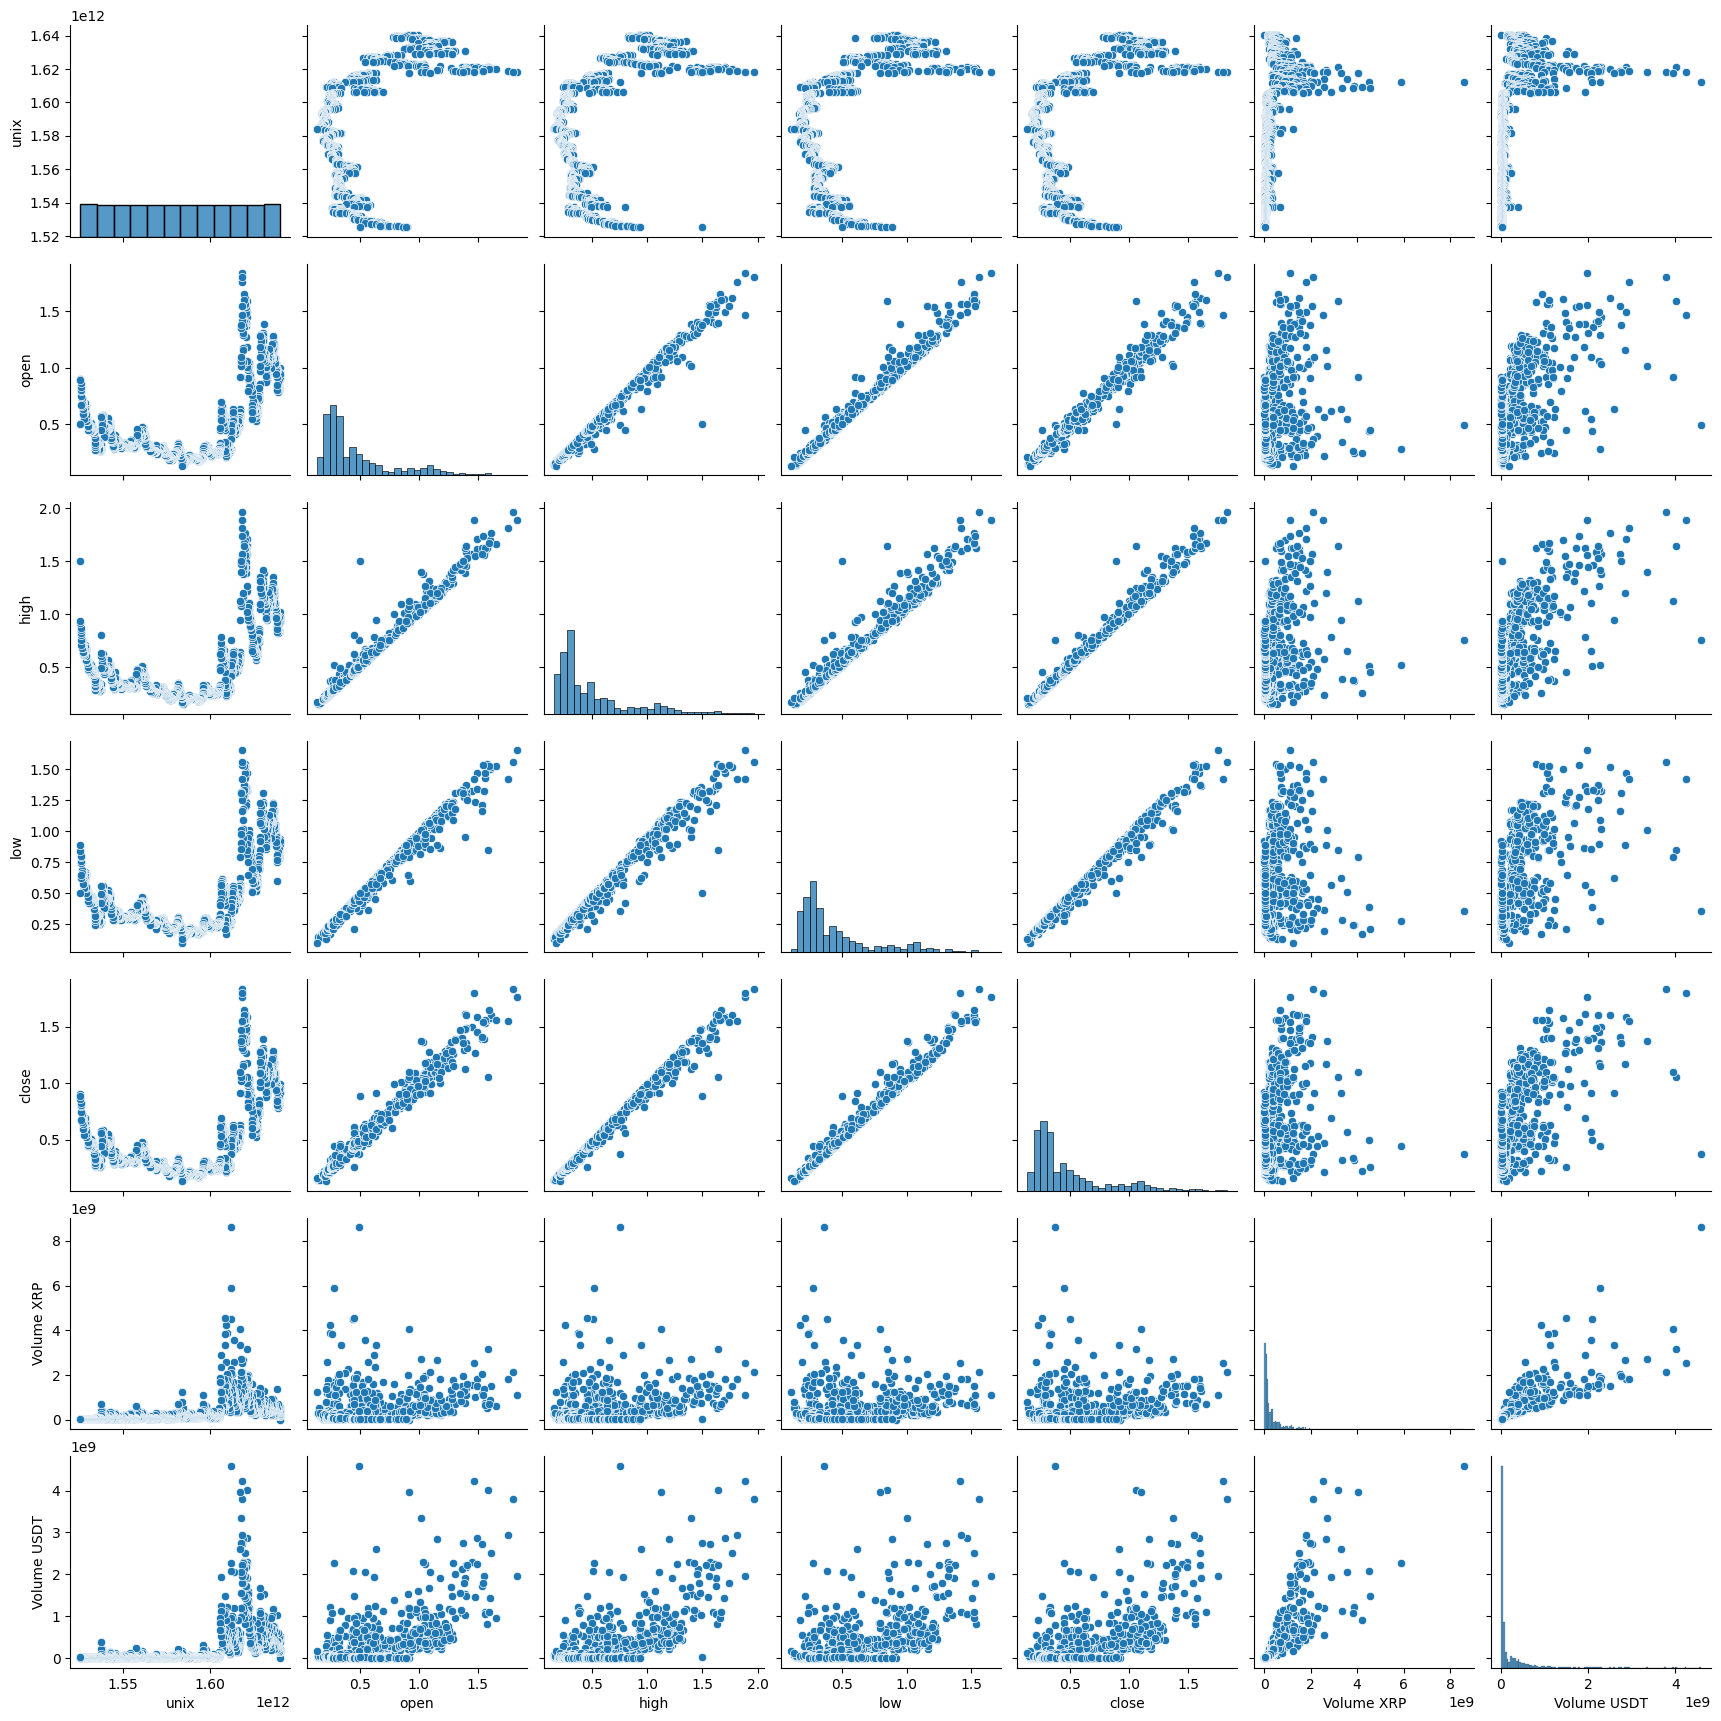

In [ ]:
sns.pairplot(crypto)

In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


In [ ]:
#To replace all missing values in existing data frame
cryp=crypto.dropna()
cryp.head(5)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [ ]:
#how to detect ouliers
print("Highest allowed",cryp['close'].mean()+3*cryp['close'].std())
print("Lowest allowed",cryp['close'].mean()-3*cryp['close'].std())

Highest allowed 1.4340129955674752
Lowest allowed -0.48674989211919933


In [ ]:
#Finding outlier
cryp[(cryp['close']>1.434)|(cryp['close']<-0.48674989)]

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
223,1.621300e+12,5-18-2021,XRP-USDT,1.49520,1.70500,1.46980,1.58890,1.813933e+09,2.869966e+09
224,1.621210e+12,5-17-2021,XRP-USDT,1.44960,1.56500,1.32420,1.49460,1.560737e+09,2.285971e+09
225,1.621120e+12,5-16-2021,XRP-USDT,1.49110,1.61310,1.33730,1.44960,1.498148e+09,2.246035e+09
226,1.621040e+12,5-15-2021,XRP-USDT,1.39980,1.58690,1.32110,1.49040,1.495465e+09,2.182428e+09
230,1.620690e+12,5-11-2021,XRP-USDT,1.39100,1.49050,1.35550,1.47860,7.241011e+08,1.034940e+09
232,1.620520e+12,5-9-2021,XRP-USDT,1.56110,1.59680,1.42490,1.53450,7.269542e+08,1.101438e+09
233,1.620430e+12,5-8-2021,XRP-USDT,1.57950,1.62770,1.54040,1.56110,5.145863e+08,8.133451e+08
234,1.620350e+12,5-7-2021,XRP-USDT,1.60280,1.69500,1.50500,1.57930,8.946979e+08,1.424597e+09
235,1.620260e+12,5-6-2021,XRP-USDT,1.61370,1.76580,1.52100,1.60280,1.507415e+09,2.502924e+09
236,1.620170e+12,5-5-2021,XRP-USDT,1.38780,1.62400,1.36600,1.61330,1.261641e+09,1.919965e+09


In [ ]:
#TrimmingOutliers
cryp_10=cryp[(cryp['close']<1.434) &(cryp['close']>-0.48674989)]
cryp_10

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.92000,0.92370,0.92000,0.92260,2.384512e+06,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.92520,0.93340,0.90520,0.92000,1.634385e+08,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.91140,0.93500,0.89810,0.92520,2.500749e+08,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.99410,0.99660,0.89640,0.91150,5.672341e+08,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.95380,1.01670,0.93720,0.99410,4.794362e+08,4.729372e+08
...,...,...,...,...,...,...,...,...,...
1329,1.525740e+12,5-8-2018,XRP-USDT,0.82490,0.84802,0.79200,0.80667,1.297130e+07,1.057184e+07
1330,1.525650e+12,5-7-2018,XRP-USDT,0.86482,0.86886,0.80000,0.82490,1.730349e+07,1.419228e+07
1331,1.525560e+12,5-6-2018,XRP-USDT,0.90280,0.91800,0.83774,0.86483,1.600204e+07,1.399714e+07
1332,1.525480e+12,5-5-2018,XRP-USDT,0.88980,0.93500,0.88800,0.90280,1.681617e+07,1.528200e+07


In [ ]:
#Capping of Outliers
upper_limit=cryp_10['close'].mean() + 3*cryp_10['close'].std()
lower_limit=cryp_10['close'].mean() - 3*cryp_10['close'].std()
print('Upper threshold ',upper_limit)
print('lower threshold',lower_limit)

Upper threshold  1.3302132993364337
lower threshold -0.41678491273064994


In [ ]:
# apply the capping
cryp_10['close']=np.where(
    cryp_10 ['close']>upper_limit,
    upper_limit,
    np.where(
        cryp_10['close']<lower_limit,
        lower_limit,
        cryp_10['close']
    )
)
df_cryp=cryp_10
df_cryp.head()

<ipython-input-12-3f70099df93e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryp_10['close']=np.where(


,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [ ]:
#how to detect ouliers
print("Highest allowed",df_cryp['open'].mean()+3*df_cryp['open'].std())
print("Lowest allowed",df_cryp['open'].mean()-3*df_cryp['open'].std())

Highest allowed 1.3357275510381927
Lowest allowed -0.4217690578875079


In [ ]:
#Finding outlier
df_cryp[(df_cryp['open']>1.335727551)|(df_cryp['open']<-0.421769)]

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
111,1.630970e+12,9-7-2021,XRP-USDT,1.38940,1.39220,0.95240,1.129200,1.297978e+09,1.530457e+09
222,1.621380e+12,5-19-2021,XRP-USDT,1.58930,1.64480,0.85000,1.056800,3.180237e+09,4.014466e+09
227,1.620950e+12,5-14-2021,XRP-USDT,1.36440,1.44880,1.32100,1.330213,7.728016e+08,1.068219e+09
229,1.620780e+12,5-12-2021,XRP-USDT,1.47880,1.54700,1.23500,1.269100,1.028882e+09,1.466458e+09
231,1.620600e+12,5-10-2021,XRP-USDT,1.53430,1.62700,1.21400,1.330213,1.154087e+09,1.710822e+09
237,1.620090e+12,5-4-2021,XRP-USDT,1.55460,1.55800,1.32000,1.330213,1.375223e+09,1.969497e+09
242,1.619650e+12,4-29-2021,XRP-USDT,1.35760,1.42000,1.32630,1.330213,8.246254e+08,1.140422e+09
243,1.619570e+12,4-28-2021,XRP-USDT,1.40170,1.44920,1.28140,1.330213,1.092879e+09,1.485523e+09
244,1.619480e+12,4-27-2021,XRP-USDT,1.36290,1.46200,1.32840,1.330213,1.510880e+09,2.118259e+09
250,1.618960e+12,4-21-2021,XRP-USDT,1.38500,1.46450,1.27545,1.290970,1.301404e+09,1.787718e+09


In [ ]:
#TrimmingOutliers
df_11=df_cryp[(df_cryp['open']<1.335727551)&(df_cryp['open']>--0.421769)]
df_11

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.92000,0.92370,0.92000,0.92260,2.384512e+06,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.92520,0.93340,0.90520,0.92000,1.634385e+08,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.91140,0.93500,0.89810,0.92520,2.500749e+08,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.99410,0.99660,0.89640,0.91150,5.672341e+08,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.95380,1.01670,0.93720,0.99410,4.794362e+08,4.729372e+08
...,...,...,...,...,...,...,...,...,...
1329,1.525740e+12,5-8-2018,XRP-USDT,0.82490,0.84802,0.79200,0.80667,1.297130e+07,1.057184e+07
1330,1.525650e+12,5-7-2018,XRP-USDT,0.86482,0.86886,0.80000,0.82490,1.730349e+07,1.419228e+07
1331,1.525560e+12,5-6-2018,XRP-USDT,0.90280,0.91800,0.83774,0.86483,1.600204e+07,1.399714e+07
1332,1.525480e+12,5-5-2018,XRP-USDT,0.88980,0.93500,0.88800,0.90280,1.681617e+07,1.528200e+07


In [ ]:
#Capping of Outliers
upper_limit=df_11['open'].mean() + 3*df_11['open'].std()
lower_limit=df_11['open'].mean() - 3*df_11['open'].std()
print('Upper threshold ',upper_limit)
print('lower threshold',lower_limit)

Upper threshold  1.509864170799898
lower threshold -0.060913192755985945


In [ ]:
# apply the capping
df_11['open']=np.where(
    df_11 ['open']>upper_limit,
    upper_limit,
    np.where(
        df_11['open']<lower_limit,
        lower_limit,
        df_11['open']
    )
)
df_cryp1=df_11
df_cryp1.head()

<ipython-input-17-d6abdf6a4cb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['open']=np.where(


,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [ ]:
cryp11=df_cryp1[['unix','date','symbol','open','high','low','close','Volume XRP','Volume USDT']].copy()
cryp11.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [ ]:
cryp11["Volume XRP"].rename()

0       2.384512e+06
1       1.634385e+08
2       2.500749e+08
3       5.672341e+08
4       4.794362e+08
            ...     
1329    1.297130e+07
1330    1.730349e+07
1331    1.600204e+07
1332    1.681617e+07
1333    2.089021e+07
Length: 501, dtype: float64

In [ ]:
cryp11.rename(columns = {'Volume XRP':'XRP','Volume USDT':'USDT'},inplace = True)
print(cryp11.columns)

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'XRP',
       'USDT'],
      dtype='object')


In [ ]:
cryp11.head()

,unix,date,symbol,open,high,low,close,XRP,USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


# Prediction of closing price

In [ ]:
regcrypto_S1 = smf.ols('close ~ open + high + low +	XRP +USDT', data=cryp11).fit()
print(regcrypto_S1.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:03:08   Log-Likelihood:                 1155.7
No. Observations:                 501   AIC:                            -2299.
Df Residuals:                     495   BIC:                            -2274.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0231      0.004      5.665      0.0

In [ ]:
feature=cryp11[['open','high','low','close','XRP','USDT']].copy()
feature.head()

,open,high,low,close,XRP,USDT
0,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


####Feature selection  by Extra Tree using  Visualisation

In [ ]:
#lets extract features and targets
X=feature.drop(columns=['close'],axis=1)
y=feature['close']

[0.38485422 0.36280112 0.24565578 0.00301717 0.00367171]


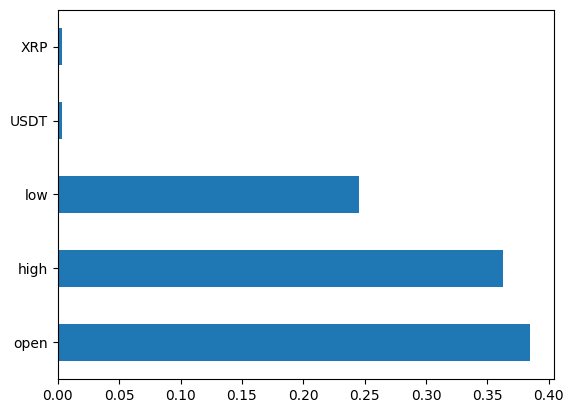

In [ ]:
# Using ExtraTreesRegressor for feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

m_etr = ExtraTreesRegressor()
m_etr.fit(X, y)

print(m_etr.feature_importances_)

# Plotting feature importances
feat_importances = pd.Series(m_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

#### Vif Values for feature selction

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

W =feature[['open','high','low','XRP','USDT']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = W.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(W.values, i)
                          for i in range(len(W.columns))]

print(vif_data)

  feature         VIF
0    open  467.508615
1    high  239.792072
2     low  463.201091
3     XRP    8.211159
4    USDT   11.348772


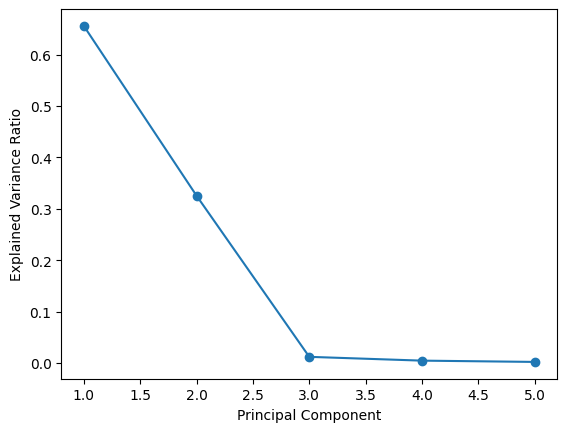

In [ ]:
# Load the necessary libraries and dataset
import pandas as pd

# Create a dataframe for the continuous features
df = feature.drop(columns=['close'], axis=1)

# Scale the continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA to the scaled data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance for each principal component
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Select the top 5 principal components as features
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled), columns=['PC{}'.format(i) for i in range(1, n_components+1)])

In [ ]:
# Select the top n principal components
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(df_scaled)

# Create a DataFrame with the absolute loadings of the top principal components
loadings = pd.DataFrame(abs(pca.components_), columns=df.columns)
loadings.index = ['PC{}'.format(i) for i in range(1, n_components+1)]
print(loadings)

         open      high       low       XRP      USDT
PC1  0.523196  0.534505  0.508191  0.221836  0.364829
PC2  0.237945  0.169293  0.296397  0.706399  0.572601
PC3  0.154081  0.145261  0.201292  0.661454  0.690737
PC4  0.403194  0.814003  0.320724  0.119422  0.240227
PC5  0.695228  0.044085  0.714499  0.002513  0.064811


In [ ]:
# Load the necessary libraries and dataset
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Extract features and target variable
X = feature.drop(columns=['close'], axis=1)
y = feature['close']

# Create a linear regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) with 3 features
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Print the selected features
for i, col in enumerate(X.columns):
    if rfe.support_[i]:
        print(col)


open
high
low


#### Closing Price prediction

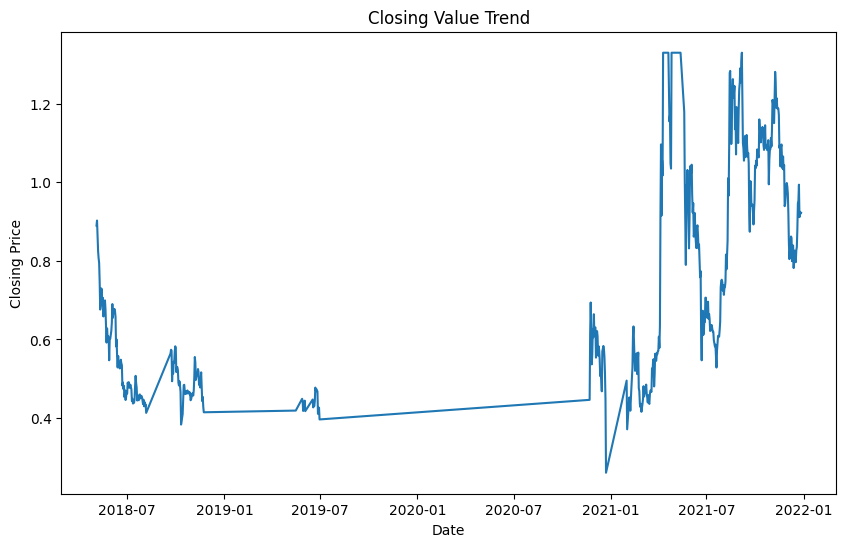

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = cryp11

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'],format='%m-%d-%Y')

# Create a line plot of the close price over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['close'])

# Set the axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.title('Closing Value Trend')
# Show the plot
plt.show()

In [ ]:
import pandas as pd
# read the data frame
df10 =cryp11

# find the correlation between features
corr_matrix = df10.corr()

# print the correlation matrix
print(corr_matrix)

           unix      open      high       low     close       XRP      USDT
unix   1.000000  0.633135  0.624331  0.623854  0.630612  0.384806  0.468670
open   0.633135  1.000000  0.974156  0.986406  0.978777  0.112039  0.399618
high   0.624331  0.974156  1.000000  0.964439  0.986270  0.190700  0.483241
low    0.623854  0.986406  0.964439  1.000000  0.984579  0.036049  0.325737
close  0.630612  0.978777  0.986270  0.984579  1.000000  0.121539  0.425073
XRP    0.384806  0.112039  0.190700  0.036049  0.121539  1.000000  0.895772
USDT   0.468670  0.399618  0.483241  0.325737  0.425073  0.895772  1.000000


<ipython-input-31-04d77d51478a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df10.corr()


<ipython-input-32-b3c6b1bf15d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df10.corr(),annot=True)


<Figure size 32000x10000 with 0 Axes>

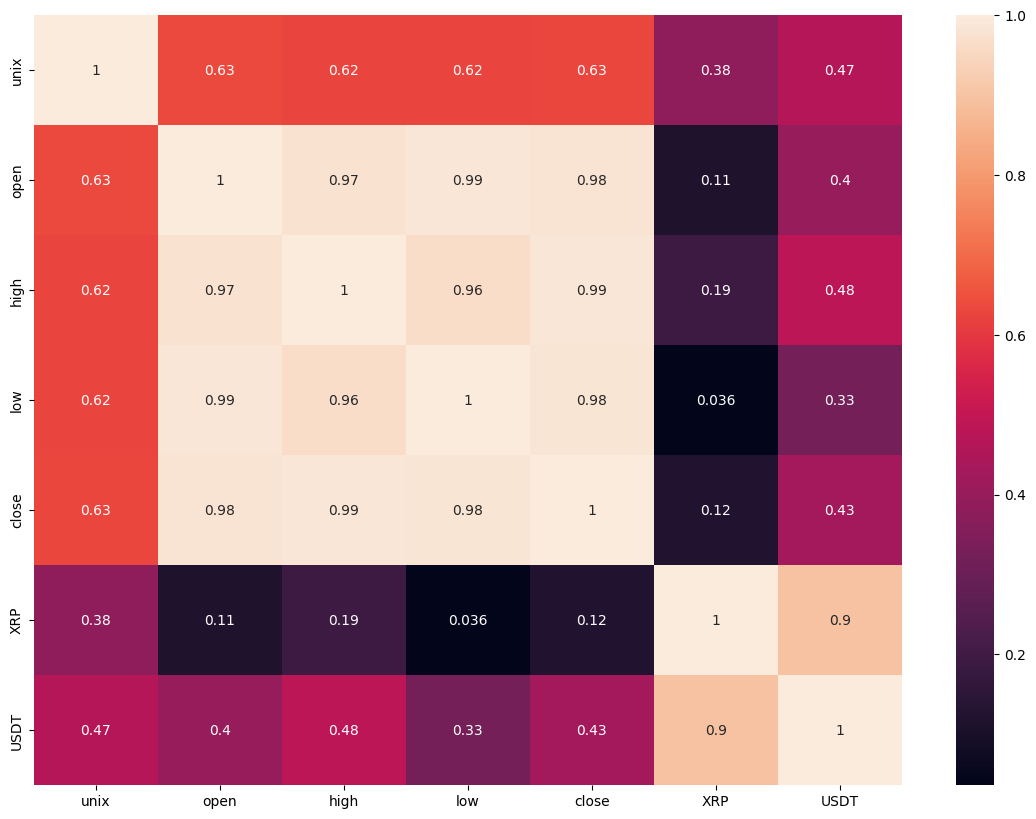

<Figure size 32000x10000 with 0 Axes>

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df10.corr(),annot=True)
#plt.figure(figsize = (320,100))
plt.figure(figsize = (320,100))

This multicolinearty table shows darker cell values arehaving lower degree of co relation which means the features are independent to each other xrp to open, XRP to low

<ipython-input-33-52e3c250b175>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crypto = crypto.resample('D').mean()  # Resample data at daily frequency
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: nan%


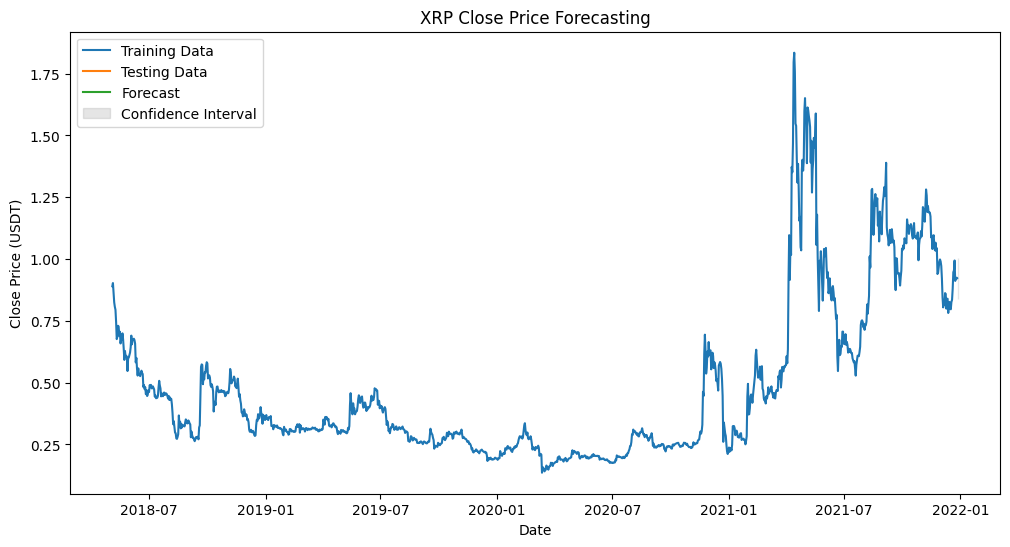

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data
crypto = pd.read_csv('/content/drive/MyDrive/crypto(Data).csv', parse_dates=['date'], index_col='date')

# Preprocessing data
crypto = crypto.resample('D').mean()  # Resample data at daily frequency
crypto = crypto.fillna(method='ffill')  # Fill missing values with previous day's close

# Split data into train and test sets
train_data = crypto.loc[:'2021-12-27']
test_data = crypto.loc['2021-12-27':]

# Fit ARIMA model on training data
model_cryp = ARIMA(train_data['close'], order=(1, 1, 1))
fitted_model = model_cryp.fit()

# Generate forecasts for test set
forecast = fitted_model.get_forecast(steps=len(test_data))

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data['close'] - forecast_values) / test_data['close'])) * 100
print(f"MAPE: {mape:.2f}%")

# Visualize actual vs predicted close prices
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(train_data.index, train_data['close'], label='Training Data')
plt.plot(test_data.index, test_data['close'], label='Testing Data')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Interval')  # Plot confidence interval
plt.legend()
plt.title('XRP Close Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price (USDT)')
plt.show()


###Experiments

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [ ]:
crypto.head()

,unix,open,high,low,close,Volume XRP,Volume USDT
date,,,,,,,
2018-05-04,1.525390e+12,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69
2018-05-05,1.525480e+12,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08
2018-05-06,1.525560e+12,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56
2018-05-07,1.525650e+12,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73
2018-05-08,1.525740e+12,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13


In [ ]:
# Rename multiple columns
crypto.rename(columns={'Volume XRP': 'Volume_INR',
                       'Volume USDT': 'Volume_USD'}, inplace=True)
crypto.head()

,unix,open,high,low,close,Volume_INR,Volume_USD
date,,,,,,,
2018-05-04,1.525390e+12,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69
2018-05-05,1.525480e+12,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08
2018-05-06,1.525560e+12,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56
2018-05-07,1.525650e+12,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73
2018-05-08,1.525740e+12,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13


In [ ]:
# Selecting the X and y variables
X = crypto.drop(columns=['Volume_USD','Volume_INR'])
y = crypto['Volume_INR']

In [ ]:
X

,unix,open,high,low,close
date,,,,,
2018-05-04,1.525390e+12,0.50000,1.50000,0.50000,0.88990
2018-05-05,1.525480e+12,0.88980,0.93500,0.88800,0.90280
2018-05-06,1.525560e+12,0.90280,0.91800,0.83774,0.86483
2018-05-07,1.525650e+12,0.86482,0.86886,0.80000,0.82490
2018-05-08,1.525740e+12,0.82490,0.84802,0.79200,0.80667
...,...,...,...,...,...
2021-12-23,1.640220e+12,0.95380,1.01670,0.93720,0.99410
2021-12-24,1.640300e+12,0.99410,0.99660,0.89640,0.91150
2021-12-25,1.640390e+12,0.91140,0.93500,0.89810,0.92520


In [ ]:
y

date
2018-05-04    2.089021e+07
2018-05-05    1.681617e+07
2018-05-06    1.600204e+07
2018-05-07    1.730349e+07
2018-05-08    1.297130e+07
                  ...     
2021-12-23    4.794362e+08
2021-12-24    5.672341e+08
2021-12-25    2.500749e+08
2021-12-26    1.634385e+08
2021-12-27    2.384512e+06
Freq: D, Name: Volume_INR, Length: 1334, dtype: float64

In [ ]:
# Using Cross Validation through Time Series Split and Running Linear Regression
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

[-1.3649714  -0.07193166  0.21657915 -0.20007841 -0.90014014]


Checking The Accuracy of the model through time series split:

In [ ]:
lr.fit(X, y) # refit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [ 6.52763052e-03  8.54029238e+08  4.53172521e+09 -7.82364365e+09
  1.89910005e+09]
Intercept: -10004776313.318258


Getting the coefficients and the intercept with Time Series Split:

In [ ]:
cv_results = cross_val_score(lr, X, y, cv=TimeSeriesSplit())
np.mean(cv_results)

-0.4641084910399102

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Volume_INR ~ unix+open+high+low+close", data =crypto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Volume_INR   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     289.1
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          2.02e-209
Time:                        03:07:51   Log-Likelihood:                -28345.
No. Observations:                1334   AIC:                         5.670e+04
Df Residuals:                    1328   BIC:                         5.673e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      -1e+10   6.08e+08    -16.461      0.0

In [ ]:
import statsmodels.formula.api as sm
model2 = sm.ols(formula="Volume_INR ~ unix+open+high+low+close+unix:open:high:low:close+unix:open+unix:open:high+unix:open:high:low:+open:high:low:close+open:high:low", data =crypto).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Volume_INR   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     244.3
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          1.78e-254
Time:                        03:08:07   Log-Likelihood:                -28232.
No. Observations:                1334   AIC:                         5.648e+04
Df Residuals:                    1325   BIC:                         5.653e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Sample data (replace this with your actual dataset)
data = {
    'open': [0.50000, 0.88980, 0.90280, 0.86482, 0.82490],
    'high': [1.50000, 0.93500, 0.91800, 0.86886, 0.84802],
    'low': [0.50000, 0.88800, 0.83774, 0.80000, 0.79200],
    'close': [0.88990, 0.90280, 0.86483, 0.82490, 0.80667],
    'Volume XRP': [20890213.82, 16816165.30, 16002035.80, 17303486.40, 12971303.18],
  }

df = pd.DataFrame(data)

# Add interaction terms between features
crypto['open_high'] = crypto['open'] * crypto['high']
crypto['open_low'] = crypto['open'] * crypto['low']
crypto['open_close'] = crypto['open'] * crypto['close']

crypto['close_high'] = crypto['close'] * crypto['high']
crypto['close_low'] = crypto['close'] * crypto['low']
crypto['high_low'] = crypto['high'] * crypto['low']
crypto['low_high_close'] = crypto['low'] * crypto['high'] * crypto['close']
crypto['open_low_high'] = crypto['open'] * crypto['low'] * crypto['high']
crypto['open_close_high'] = crypto['open'] * crypto['close'] * crypto['high']
crypto['open_high'] = crypto['open'] * crypto['high']
crypto['open_low'] = crypto['open'] * crypto['low']
crypto['open_close'] = crypto['open'] * crypto['close']
# Add more interaction terms as needed for other features

# Define the target and features for the regression analysis
target = crypto['close']
features = crypto[['open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT', 'open_high', 'open_low', 'open_close']]

# Add a constant term for the intercept
features = sm.add_constant(features)

# Perform the regression analysis
model = sm.OLS(target, features).fit()

# Print the summary of the regression results
print(model.summary())
